In [1]:
from kgap_tools import execute_to_df, generate_sparql
import pandas as pd
import matplotlib.pyplot as plt

## Publications of people/researchers

In this notebook we are going to have a look at people/researcher's publications starting from their identifier in our own CRIS (Current Research Information System) <https://marineinfo.org>.  
  
In our internal information system, we maintain metadata records of people and researchers working at VLIZ.  
These metadata records are characterized by their own uniue identifier. For example, the metadata record about "Katrina Exter" has identifier <https://marineinfo.org/id/person/35548>.  
These record list all kinds of information of that person, including other identifiers such as their OrcIDs.  
As you can see in Katrina's metadata below.

In [8]:
info_katrina = execute_to_df("katrina_info.sparql")
info_katrina

,katrina,p,o
0,https://marineinfo.org/id/person/35548,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,https://schema.org/Person
1,https://marineinfo.org/id/person/35548,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/ns/dcat#Resource
2,https://marineinfo.org/id/person/35548,https://schema.org/identifier,https://orcid.org/0000-0002-5911-1536
3,https://marineinfo.org/id/person/35548,https://schema.org/givenName,Katrina
4,https://marineinfo.org/id/person/35548,https://schema.org/familyName,Exter
5,https://marineinfo.org/id/person/35548,https://schema.org/keywords,https://rdflib.github.io/.well-known/genid/rdf...
6,https://marineinfo.org/id/person/35548,https://schema.org/image,https://images.vliz.be/thumbs/133324_katrina-e...
7,https://marineinfo.org/id/person/35548,http://www.w3.org/ns/org#hasMembership,https://rdflib.github.io/.well-known/genid/rdf...
8,https://marineinfo.org/id/person/35548,http://www.w3.org/ns/org#hasMembership,https://rdflib.github.io/.well-known/genid/rdf...
9,https://marineinfo.org/id/person/35548,http://www.w3.org/ns/org#hasMembership,https://rdflib.github.io/.well-known/genid/rdf...


#### The value of persistent identifiers

Though those external identifiers we can get information without having to maintain it ourselves.  
For example, via *schema:identifier* we can get to the OrcID of a person and consequently also their publications, which they themselves maintain.  

In [21]:
katrina_pubs = execute_to_df("katrina_pubs.sparql")
katrina_pubs

,identifier,pub
0,https://orcid.org/0000-0002-5911-1536,https://doi.org/10.1051/0004-6361/201219723
1,https://orcid.org/0000-0002-5911-1536,https://rdflib.github.io/.well-known/genid/rdf...
2,https://orcid.org/0000-0002-5911-1536,https://doi.org/10.1051/0004-6361:20054190
3,https://orcid.org/0000-0002-5911-1536,https://rdflib.github.io/.well-known/genid/rdf...
4,https://orcid.org/0000-0002-5911-1536,https://doi.org/10.1051/0004-6361/201118606
...,...,...
148,https://orcid.org/0000-0002-5911-1536,https://rdflib.github.io/.well-known/genid/rdf...
149,https://orcid.org/0000-0002-5911-1536,https://doi.org/10.5281/zenodo.8402864
150,https://orcid.org/0000-0002-5911-1536,https://rdflib.github.io/.well-known/genid/rdf...
151,https://orcid.org/0000-0002-5911-1536,https://rdflib.github.io/.well-known/genid/rdf...


In [22]:
# How many publications does Katrina have?
katrina_pubs.groupby("identifier").nunique()

,pub
identifier,
https://orcid.org/0000-0002-5911-1536,153


#### Generalizing to all people in the knowledge graph | your CRIS

This can be generalized to a group of researchers.  
In the knowledge graph from in this demo there are 13 person records from marineinfo.org included, yielding the following results: 

In [30]:
marineinfoperson_pubs = execute_to_df("miperson_pubs.sparql")
marineinfoperson_pubs

,person,first_name,last_name,identifier,pub
0,https://marineinfo.org/id/person/29287,Paula,Oset Garcia,https://orcid.org/0000-0001-9506-766X,https://doi.org/10.17605/osf.io/gdq93
1,https://marineinfo.org/id/person/35548,Katrina,Exter,https://orcid.org/0000-0002-5911-1536,https://doi.org/10.1051/0004-6361/201219723
2,https://marineinfo.org/id/person/35548,Katrina,Exter,https://orcid.org/0000-0002-5911-1536,https://rdflib.github.io/.well-known/genid/rdf...
3,https://marineinfo.org/id/person/35548,Katrina,Exter,https://orcid.org/0000-0002-5911-1536,https://doi.org/10.1051/0004-6361:20054190
4,https://marineinfo.org/id/person/35548,Katrina,Exter,https://orcid.org/0000-0002-5911-1536,https://rdflib.github.io/.well-known/genid/rdf...
...,...,...,...,...,...
177,https://marineinfo.org/id/person/29287,Paula,Oset Garcia,https://orcid.org/0000-0001-9506-766X,https://doi.org/10.5281/zenodo.7777569
178,https://marineinfo.org/id/person/29287,Paula,Oset Garcia,https://orcid.org/0000-0001-9506-766X,https://doi.org/10.5281/zenodo.8130848
179,https://marineinfo.org/id/person/29287,Paula,Oset Garcia,https://orcid.org/0000-0001-9506-766X,https://doi.org/10.5281/zenodo.5513883
180,https://marineinfo.org/id/person/29287,Paula,Oset Garcia,https://orcid.org/0000-0001-9506-766X,https://rdflib.github.io/.well-known/genid/rdf...


In [46]:
# How many publications does each person have?
person_pub_count = marineinfoperson_pubs.groupby("first_name").nunique()
person_pub_count

,person,last_name,identifier,pub
first_name,,,,
Cedric,1,1,1,2
Elien,1,1,1,1
Joanna,1,1,1,2
Katrina,1,1,1,153
Laurian,1,1,1,2
Paula,1,1,1,22


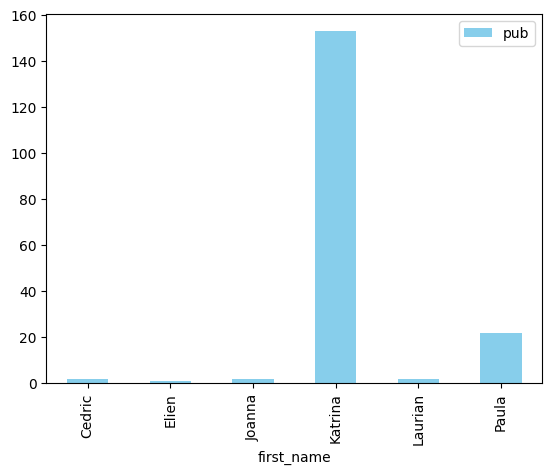

In [47]:
#visualize in a graph
person_pub_count.reset_index(inplace=True)
person_pub_count.drop(columns=['person', 'last_name', 'identifier'], inplace=True)
person_pub_count.plot(kind='bar', x='first_name', y='pub', color='skyblue')
plt.show()